In [2]:
cd /home/lansdell/projects/synthfeedback

/home/lansdell/projects/synthfeedback


In [3]:
%pylab inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


## Cartpole RNN with partial observability.

Only observe the position and angle -- requires integration over time to solve the problem

## Backprop

In [34]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'backprop'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

#tags = data['tags']
#metrics = data['metrics']

In [15]:
xs.shape

(5000, 10, 10, 20, 4)

In [13]:
data

[[]]

In [35]:
b = 5
nB = 20
theta_d = xs[:,:,:,:,0].reshape(5000,-1, nB)
theta = xs[:,:,:,:,1].reshape(5000,-1,nB)
h_d = xs[:,:,:,:,2].reshape(5000,-1,nB)
h = xs[:,:,:,:,3].reshape(5000,-1,nB)

In [36]:
np.pi/8

0.39269908169872414

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


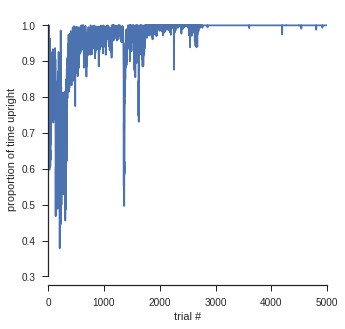

In [37]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Feedback alignment

In [30]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'feedbackalignment'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

#tags = data['tags']
#metrics = data['metrics']

In [21]:
xs.shape

(5000, 10, 10, 20, 4)

In [22]:
data

{'all_alignments': [[]],
 'all_losses': [[]],
 'n_in_epoch': 9,
 'params': {'N_episodes': 10,
  'N_epochs': 5000,
  'acclimatize': True,
  'alpha2': 1,
  'batch_size': 20,
  'grad_max': 10,
  'in_dim': 4,
  'learning_rate': 0.001,
  'lmbda': 5e-05,
  'num_steps': 10,
  'p_fire': 0.1,
  'state_size': 50,
  'var_xi': 0.5},
 'xs': array([[[[[-5.34181595e-01,  0.00000000e+00,  3.56121093e-01,
             0.00000000e+00],
           [-6.47941351e-01,  0.00000000e+00,  4.31960911e-01,
             0.00000000e+00],
           [-6.98616445e-01,  0.00000000e+00,  4.65744317e-01,
             0.00000000e+00],
           ...,
           [-7.53369331e-01,  0.00000000e+00,  5.02246201e-01,
             0.00000000e+00],
           [-4.38329339e-01,  0.00000000e+00,  2.92219549e-01,
             0.00000000e+00],
           [-6.13692582e-01,  0.00000000e+00,  4.09128368e-01,
             0.00000000e+00]],
 
          [[ 3.70193124e-02, -2.13672630e-02, -2.46794820e-02,
             1.42448433e-02],
 

In [31]:
b = 5
nB = 20
theta_d = xs[:,:,:,:,0].reshape(5000,-1, nB)
theta = xs[:,:,:,:,1].reshape(5000,-1,nB)
h_d = xs[:,:,:,:,2].reshape(5000,-1,nB)
h = xs[:,:,:,:,3].reshape(5000,-1,nB)

In [32]:
np.pi/8

0.39269908169872414

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


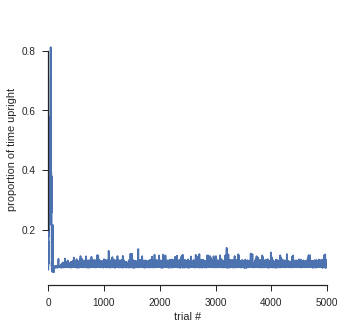

In [33]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Node perturbation

In [14]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'feedbackalignment'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

#tags = data['tags']
#metrics = data['metrics']

In [15]:
xs.shape

(5000, 10, 10, 20, 4)

In [13]:
data

[[]]

In [16]:
b = 5
nB = 20
theta_d = xs[:,:,:,:,0].reshape(5000,-1, nB)
theta = xs[:,:,:,:,1].reshape(5000,-1,nB)
h_d = xs[:,:,:,:,2].reshape(5000,-1,nB)
h = xs[:,:,:,:,3].reshape(5000,-1,nB)

In [19]:
np.pi/8

0.39269908169872414

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


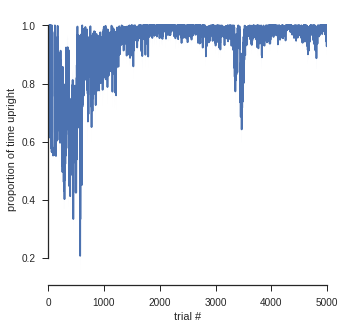

In [18]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)